In [50]:
# imports

import itertools
import numpy as np
from scipy import linalg
from sklearn import datasets, mixture
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import ArtistAnimation
from matplotlib import colors as mcolors
from IPython.display import HTML

In [148]:
# data generator settings

n_samples = 1500
n_features = 2
centers = 5
cluster_std = [np.random.ranf()*2 for i in range(centers)]
center_box = (-10, 10)
shuffle = True
random_state = np.random.randint(0, 999)

print("cluster_std: ", cluster_std)
print("random_state: ", random_state)

cluster_std:  [0.5653783180481071, 1.183945781909913, 1.337803612031334, 0.8805338293650937, 1.1253370313523166]
random_state:  367


In [157]:
# example pro EM
'''
# gen
n_samples = 1500
n_features = 2
centers = 5
cluster_std = [0.5653783180481071, 1.183945781909913, 1.337803612031334, 0.8805338293650937, 1.1253370313523166]
center_box = (-10, 10)
shuffle = True
gen_random_state = 367
# mix
mix_random_state = 178
n_components = 5
'''
# example 
'''

'''

In [158]:
# generate data

data = datasets.make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std, center_box=center_box, shuffle=shuffle, random_state=gen_random_state)

print("data: ", data)

data:  (array([[ -9.72758815,   4.66244667],
       [ -8.49231252,  -8.66652649],
       [-11.70016693,   4.90308114],
       ...,
       [ -8.46336005,  -4.8743291 ],
       [ -9.14141317,   4.81442521],
       [ -8.23460525,  -8.17082445]]), array([1, 0, 1, ..., 2, 1, 2]))


In [159]:
# color helper functions

def color(i):
    #colors = ['navy', 'c', 'cornflowerblue', 'gold', 'darkorange', 'navy', 'c', 'cornflowerblue', 'gold', 'darkorange', 'navy', 'c', 'cornflowerblue', 'gold', 'darkorange']
    colors = ["#000000","#FF0000","#00FF00","#0000FF","#FFFF00","#00FFFF","#FF00FF","#C0C0C0","#808080","#800000","#808000","#008000","#800080","#008080","#000080"]
    return colors[i]

def colors(Y):
    return [color(i) for i in Y]

Generated Data:


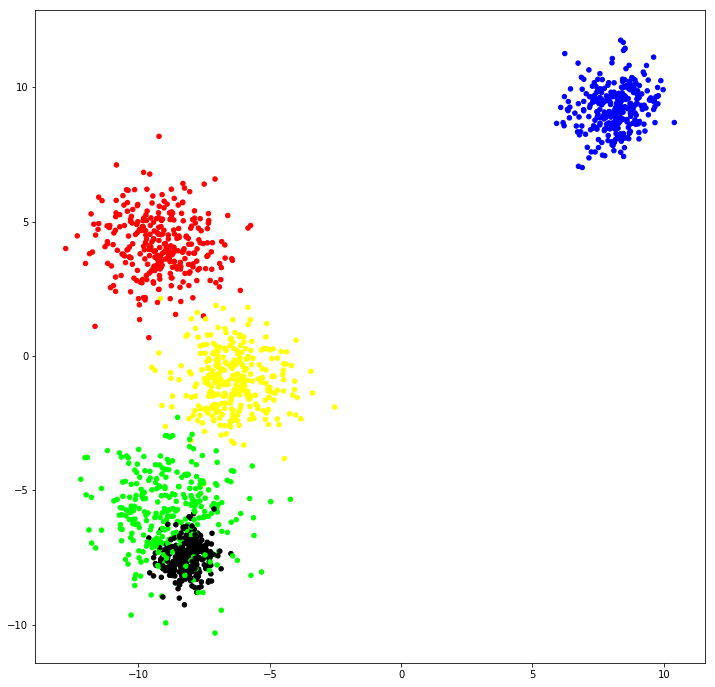

In [160]:
# plot generated data

X = data[0]
c = data[1]

xs = X[:, 0]
ys = X[:, 1]


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.scatter(xs, ys, 20, c=colors(c))

print("Generated Data:")
plt.show()

In [152]:
# generate results function
# generates gaussian mixture ellipses and classification

def generate_results(ax, mix):
    Y_ = mix.predict(X)
    means = mix.means_
    covariances = mix.covariances_
    
    # generate scatterplot
    scat = ax.scatter(X[:, 0], X[:, 1], 20, c=[color(i) for i in Y_])
    
    # generate ellipses
    ells = []
    for i, (mean, covar) in enumerate(zip(
            means, covariances)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.+angle, color=color(i), animated=True)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ells.append(ell)
        ax.add_patch(ell)
    
    return ells + [scat]
        

In [153]:
# animate results function

# animation settings
interval = 2500
repeat_delay = 2000

def animate(param, param_gm, param_bgm, X, frame_range):
    
    fig = plt.figure(figsize=(12, 8))

    # GaussianMixture (EM) subplot
    ax_gm = fig.add_subplot(121)
    ax_gm.set_title('Expectation-Maximization')
    # BayesianGaussianMixture (VI) subplot
    ax_bgm = fig.add_subplot(122)
    ax_bgm.set_title('Variational Inference')
    
    artists = []
    for frame in frame_range:

        # results: scatter and ellipses
        # gm
        gm = mixture.GaussianMixture(**param, **param_gm, max_iter=frame).fit(X)
        results_gm = generate_results(ax_gm, gm)
        # bgm
        bgm = mixture.BayesianGaussianMixture(**param, **param_bgm, max_iter=frame).fit(X)
        results_bgm = generate_results(ax_bgm, bgm)
        
        # frame counters
        # gm
        counter_gm = ax_gm.text(0.05, 0.95,'',fontsize=16,horizontalalignment='left',verticalalignment='top',transform=ax_gm.transAxes)
        if (gm.converged_):
            counter_gm.set_text(str(gm.n_iter_) + " converged")
        else:
            counter_gm.set_text(frame)
        # bgm
        counter_bgm = ax_bgm.text(0.05, 0.95,'',fontsize=16,horizontalalignment='left',verticalalignment='top',transform=ax_bgm.transAxes)
        if (bgm.converged_):
            counter_bgm.set_text(str(bgm.n_iter_) + " converged")
        else:
            counter_bgm.set_text(frame)
        
        artists.append(results_gm + results_bgm + [counter_gm, counter_bgm])

    
    return ArtistAnimation(fig, artists, interval=interval, repeat_delay=repeat_delay, blit=True)
    

In [154]:
# ignore sklearn convergence warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category = ConvergenceWarning)

In [155]:
mix_random_state = np.random.randint(0, 999)

# set EM 



In [161]:
# BayesianGaussianMixture
# settings
param = {
    'n_components': 5,
    'random_state': mix_random_state,
    'init_params': 'random'
}

print("random_state: ", param['random_state'])

param_bm = {
    
}

param_bgm = {
    
}

frame_range = [1] + list(range(10, 100, 10))

# run
anim = animate(param, param_bm, param_bgm, X, frame_range)

# display animation
plt.close(anim._fig)
HTML(anim.to_jshtml())

random_state:  178
